<a href="https://colab.research.google.com/github/crossboww/Machine_Learning/blob/main/ML_learning/Supervised_Learning/Lasso_Regressin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
--#Importing the dependencies
import numpy as np

**#Building the Lasso Regression Model**

In [ ]:
#Initializing the Lasso Regression Class
class Lasso_Regression():

  #Initialize the hyperparameters
  def __init__(self, learning_rate, no_of_iteration, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iteration = no_of_iteration
    self.lambda_parameter = lambda_parameter


  #Fitting the Dataset to the Lasso Regression Model
  def fit(self, X, Y):

    #Number of Training Examples(m) and Features (n) examples
    self.m, self.n = X.shape

    #Initialize the weight and bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X.values
    self.Y = Y.values

    #Implementing the gradient descent algoritham for optimization
    for i in range(self.no_of_iteration):
      self.update_weight()


  #Function for updating the Weight and bias values
  def update_weight(self):

    #Linear Equations for Model
    Y_prediction = self.predict(self.X)

    #gradient (dw, db)

    #gradient for Weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i] > 0:
        dw[i] = (-(2*(self.X[:, i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m
      else:
         dw[i] = (-(2*(self.X[:, i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m

    #Gradient for bias
    db = -2 * np.sum(self.Y - Y_prediction) / self.m


    #Updating the weight and bias values

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db


  #Predict functionn for Predicting the Target values
  def predict(self, X):

    return X.dot(self.w) + self.b

#Implementing the Lasso_Regression model


In [ ]:
#importing the dependescies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

#Data Pre-Processing

In [ ]:
data = pd.read_csv("salary_data.csv")

In [ ]:
data.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
data.shape

(30, 2)

In [ ]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
data.isnull().sum()

,0
YearsExperience,0
Salary,0


#Splitting the Features and Target values

In [ ]:
x = data.drop(columns = 'Salary', axis = 1)
y = data['Salary']

In [ ]:
print(x)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


#Splitting the dataset into Training data and Testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(30, 1) (24, 1) (6, 1)


#Training the Lasso-Regression Model

In [ ]:
model = Lasso_Regression(learning_rate = 0.01, no_of_iteration = 500, lambda_parameter = 10)

In [ ]:
model.fit(x_train, y_train)

In [ ]:
print("weight :", model.w)
print("bias:", model.b)

weight : [10027.43259479]
bias: 21179.16716309451


In [ ]:
# Evaluate the model using regression metrics
x_training_prediction = model.predict(x_train)

# Mean Squared Error
mse = mean_squared_error(y_train, x_training_prediction)
print("Mean Squared Error on training data:", mse)

# R-squared
r2 = r2_score(y_train, x_training_prediction)
print("R-squared on training data:", r2)

Mean Squared Error on training data: 27972467.2723763
R-squared on training data: 0.9627445426815469


In [ ]:
# Evaluate the model on the test data
x_test_prediction = model.predict(x_test)

# Mean Squared Error on test data
mse_test = mean_squared_error(y_test, x_test_prediction)
print("Mean Squared Error on test data:", mse_test)

# R-squared on test data
r2_test = r2_score(y_test, x_test_prediction)
print("R-squared on test data:", r2_test)

Mean Squared Error on test data: 69377218.65994771
R-squared on test data: 0.8624451885001636


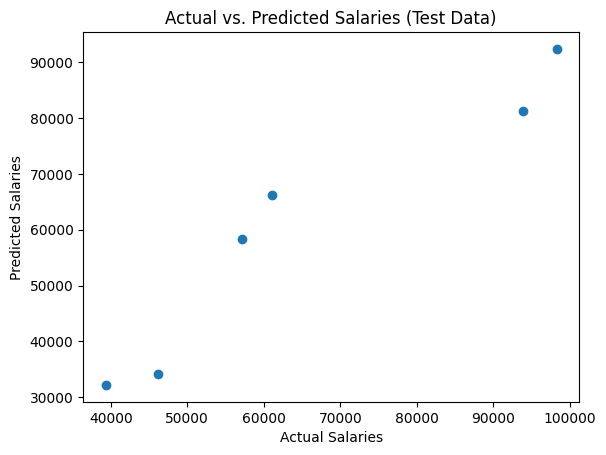

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, x_test_prediction)
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Actual vs. Predicted Salaries (Test Data)")
plt.show()

In [ ]:
# Make predictions on new data points

# Define new data points (e.g., a list of years of experience)
# You can change these values to predict salaries for different years of experience
new_years_experience = np.array([[12.0], [15.0], [5.5]]) # Example new data

# Make predictions
new_predictions = model.predict(new_years_experience)

# Print the predictions
for years, salary in zip(new_years_experience, new_predictions):
  print(f"For {years[0]} years of experience, the predicted salary is: {salary:.2f}")

For 12.0 years of experience, the predicted salary is: 141508.48
For 15.0 years of experience, the predicted salary is: 171590.83
For 5.5 years of experience, the predicted salary is: 76330.05
